In [396]:
import pandas as pd
import numpy as np
from IPython.core.display import display, HTML

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from scipy.stats import poisson
from tqdm import tqdm

%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

import chart_utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [397]:
data_out = []

for period_days in [1, 7, 14, 28, 90, 182, 365]:
    expected_blocks = 6 * 24 * period_days
#     for pool_size in tqdm(np.geomspace(0.0001, 1, num=1000)):
    for pool_size in tqdm(range(1, 100)):
        samples = np.random.poisson(pool_size / 100 * expected_blocks, 100000)
        mean, stdev = np.mean(samples), np.std(samples)
        pct = stdev / mean
        data_out.append({
            'period_days': period_days,
            'pool_size': pool_size,
            'mean': mean,
            'stdev': stdev,
            'stdev_pct': pct * 100
        })
data = pd.DataFrame(data_out)
data['mean_zero'] = 0

100%|████████████████████████████████████████████████████████| 99/99 [00:00<00:00, 176.77it/s]


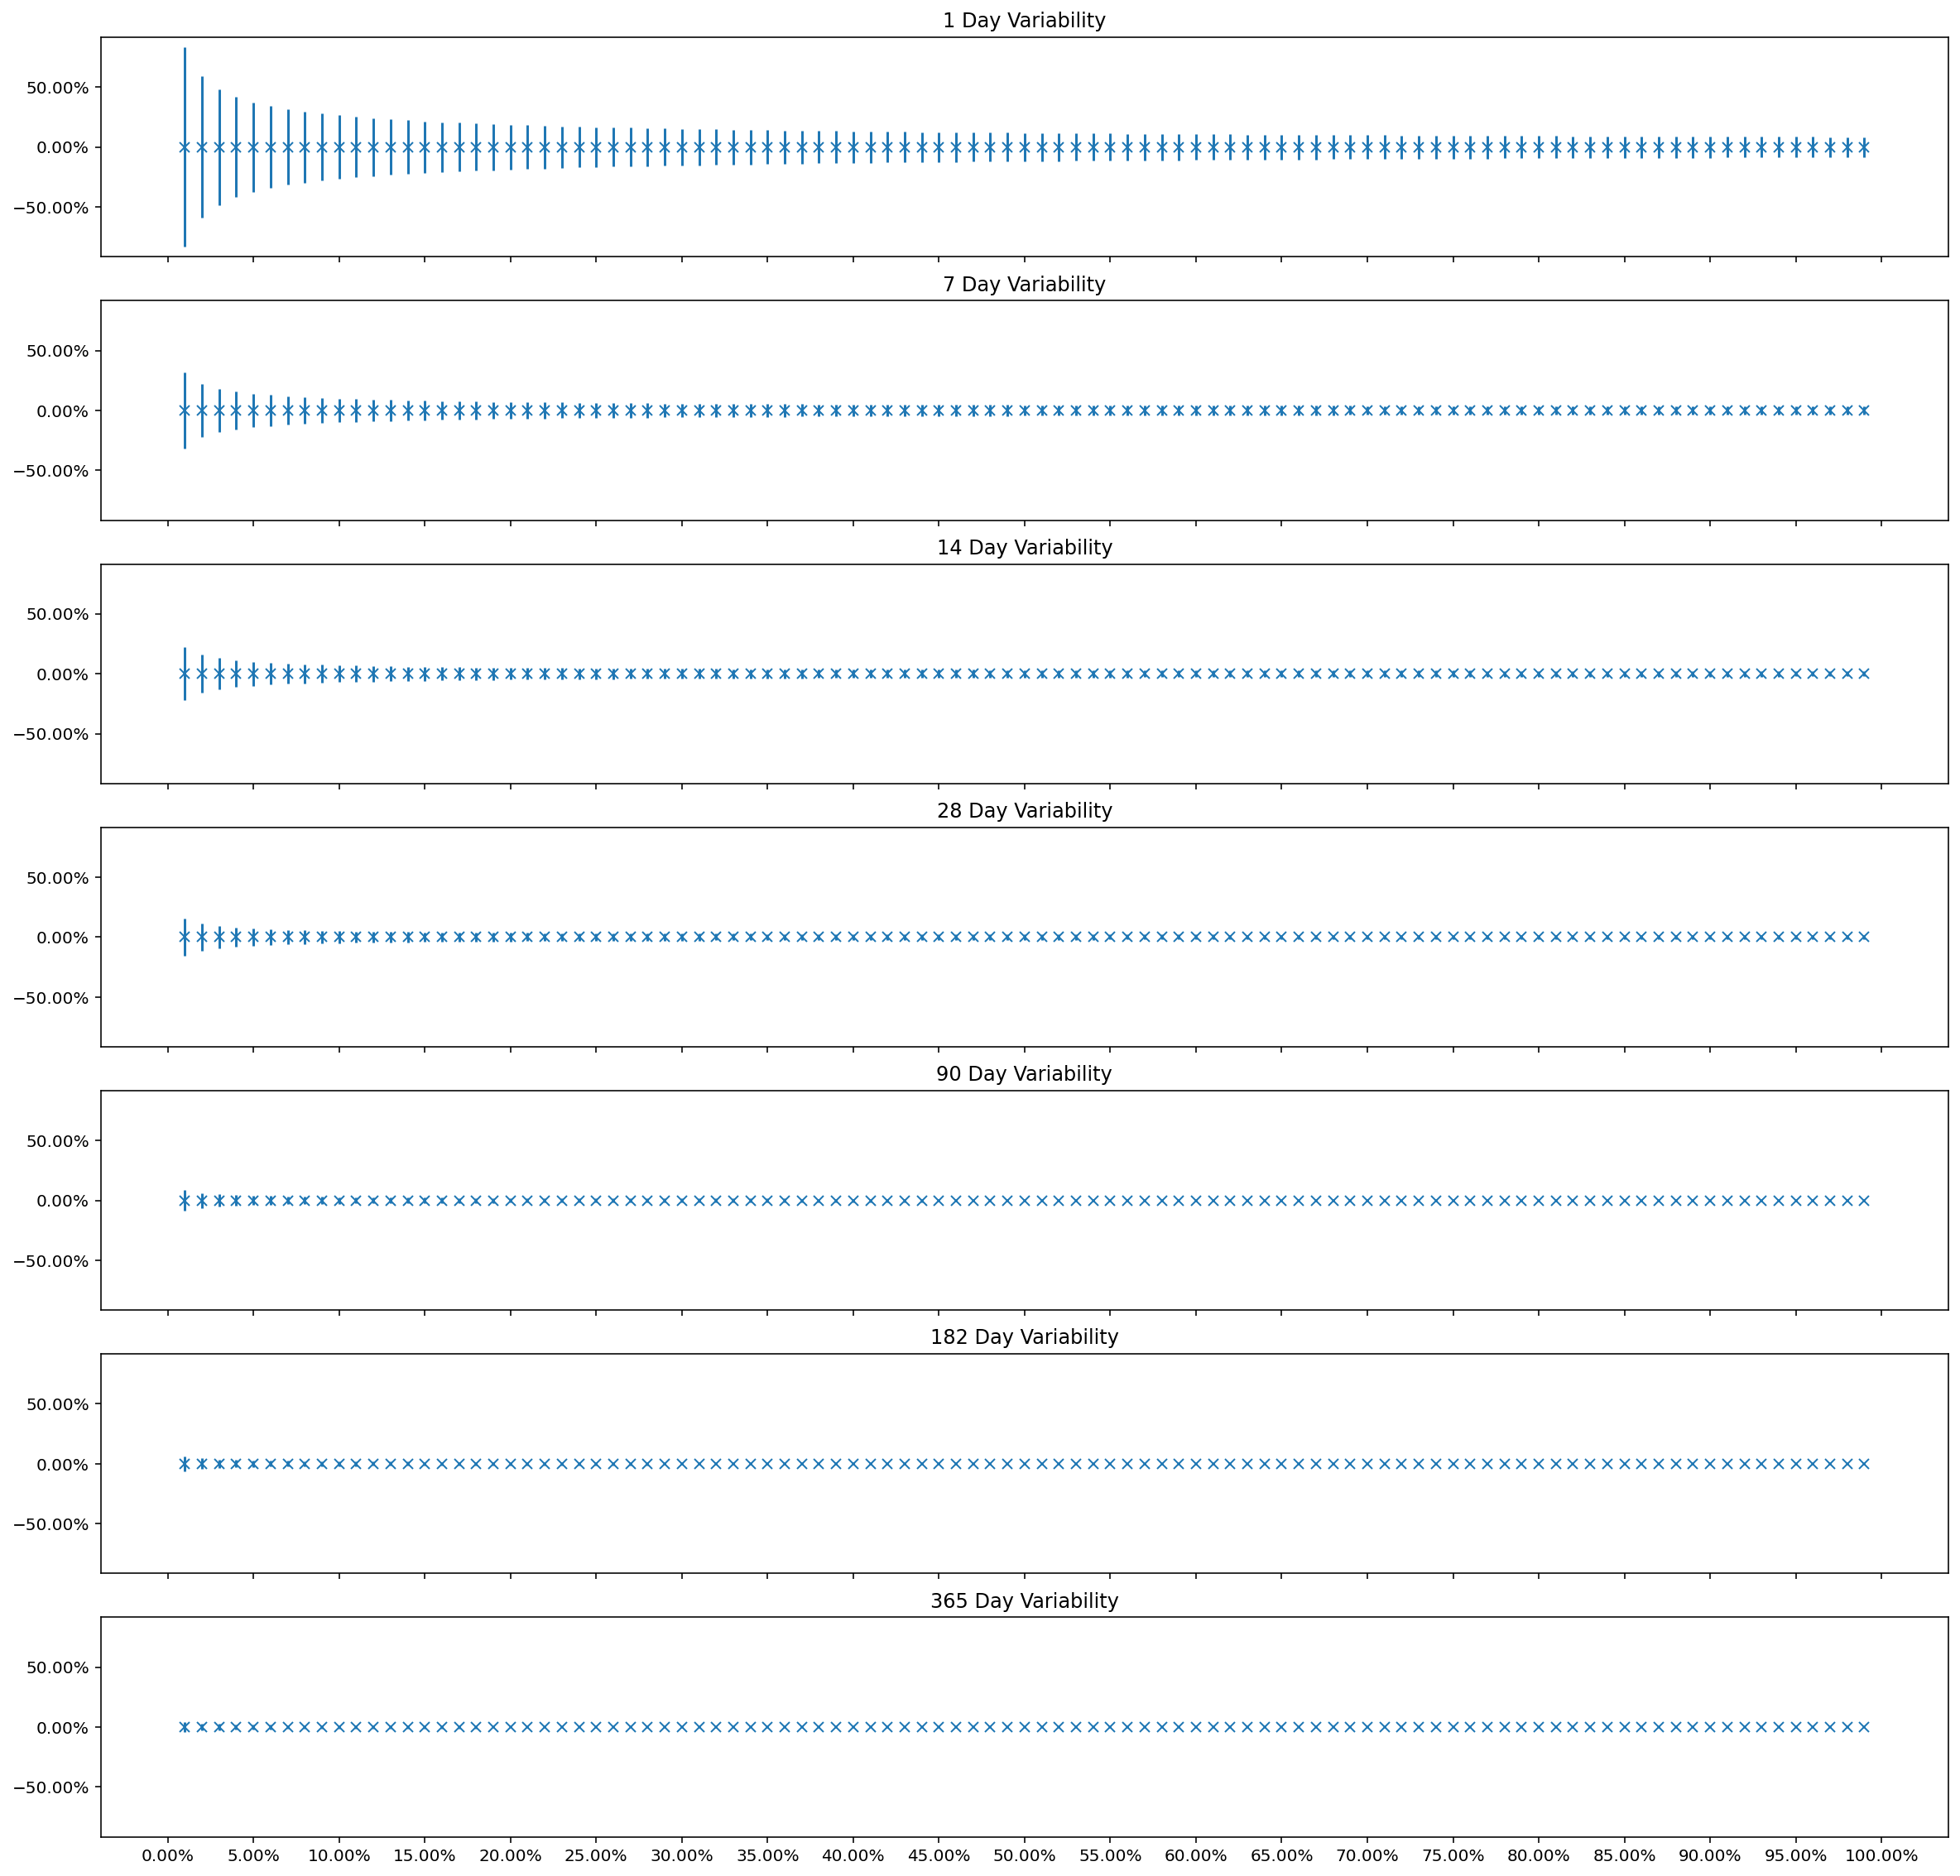

In [398]:
fig, (ax0, ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(nrows=7, sharex=True, sharey=True, figsize=(20, 20))

data_day = data.loc[
    data.period_days == 1
]

ax0.errorbar(
    data_day['pool_size'],
    data_day['mean_zero'],
    data_day['stdev_pct'],
    linestyle='None', marker='x')
ax0.set_title('1 Day Variability')
# ax0.set_yscale('log')
ax0.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=2))
ax0.set_xticks(np.arange(0,105,5))
ax0.xaxis.set_major_formatter(mtick.PercentFormatter(decimals=2))

data_day = data.loc[
    data.period_days == 7
]

ax1.errorbar(
    data_day['pool_size'],
    data_day['mean_zero'],
    data_day['stdev_pct'],
    linestyle='None', marker='x')
ax1.set_title('7 Day Variability')

data_day = data.loc[
    data.period_days == 14
]

ax2.errorbar(
    data_day['pool_size'],
    data_day['mean_zero'],
    data_day['stdev_pct'],
    linestyle='None', marker='x')
ax2.set_title('14 Day Variability')

data_day = data.loc[
    data.period_days == 28
]

ax3.errorbar(
    data_day['pool_size'],
    data_day['mean_zero'],
    data_day['stdev_pct'],
    linestyle='None', marker='x')
ax3.set_title('28 Day Variability')

data_day = data.loc[
    data.period_days == 90
]

ax4.errorbar(
    data_day['pool_size'],
    data_day['mean_zero'],
    data_day['stdev_pct'],
    linestyle='None', marker='x')
ax4.set_title('90 Day Variability')

data_day = data.loc[
    data.period_days == 182
]

ax5.errorbar(
    data_day['pool_size'],
    data_day['mean_zero'],
    data_day['stdev_pct'],
    linestyle='None', marker='x')
ax5.set_title('182 Day Variability')

data_day = data.loc[
    data.period_days == 365
]

ax6.errorbar(
    data_day['pool_size'],
    data_day['mean_zero'],
    data_day['stdev_pct'],
    linestyle='None', marker='x')
ax6.set_title('365 Day Variability')

plt.show()

In [410]:
pool_sizes = []
for i in range(1, 10):
    pool_sizes.append(i / 10000)
    pool_sizes.append(i / 1000)
    pool_sizes.append(i / 100)
for i in range(1, 20):
    pool_sizes.append(i / 20)
pool_sizes = pd.Series(pool_sizes).drop_duplicates().sort_values()

data_out = []

for period_days in [1, 7, 14, 28, 90, 182, 365]:
    expected_blocks = 6 * 24 * period_days
    for pool_size in tqdm(pool_sizes):
        samples = np.random.poisson(pool_size * expected_blocks, 100000)
        mean, stdev = np.mean(samples), np.std(samples)
        pct = stdev / mean
        data_out.append({
            'period_days': period_days,
            'pool_size': pool_size,
            'mean': mean,
            'stdev': stdev,
            'stdev_pct': pct
        })
data = pd.DataFrame(data_out)

100%|████████████████████████████████████████████████████████| 45/45 [00:00<00:00, 150.30it/s]


Text(1, 0.08, '@typerbole, stack-stats.com')

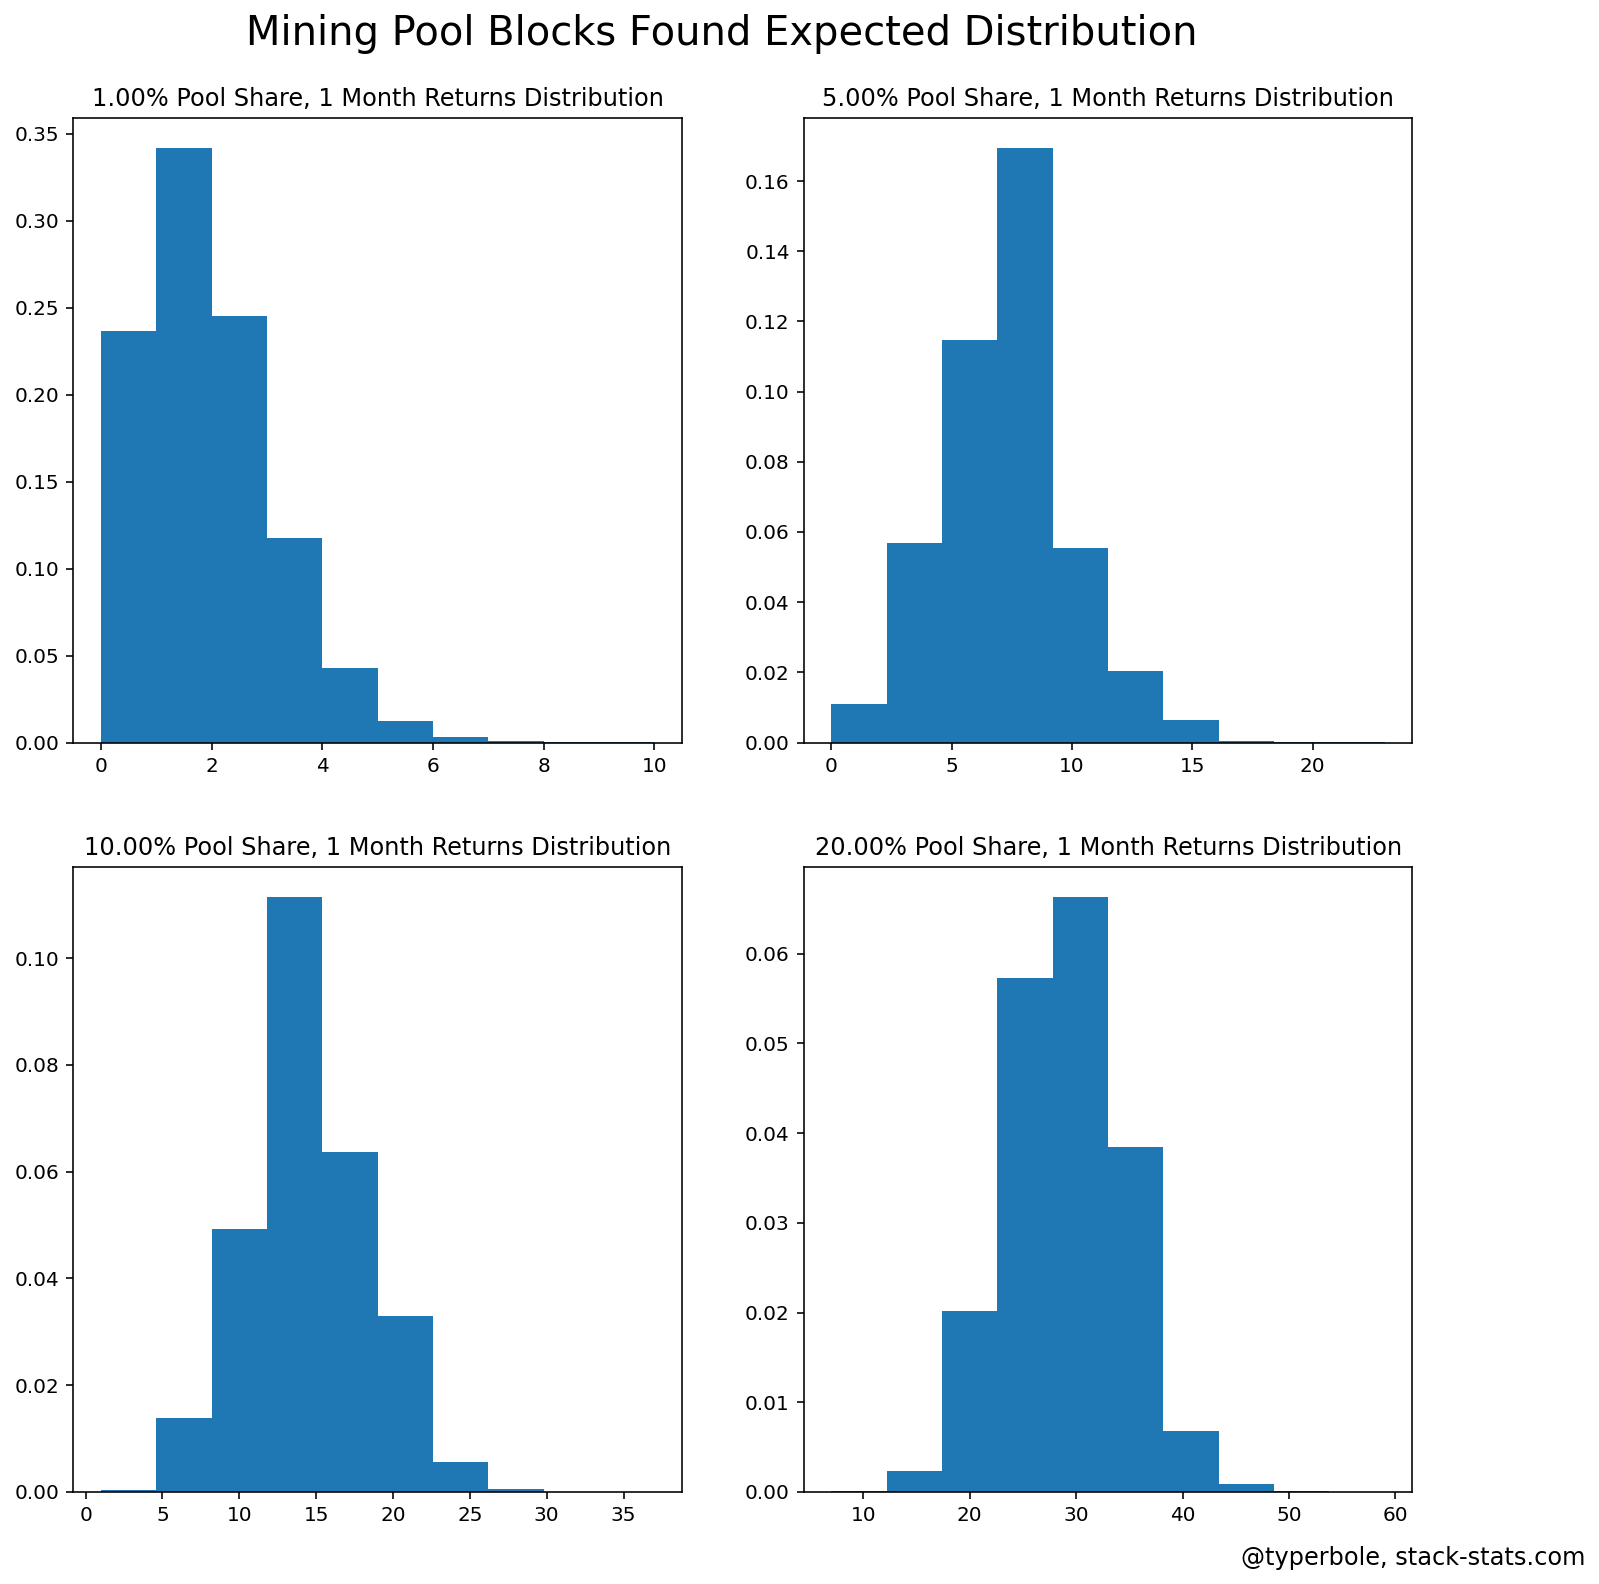

In [409]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
# fig.tight_layout()
for index, pool_size in enumerate([0.01, 0.05, 0.1, 0.2]):
    samples = np.random.poisson(pool_size * 6 * 24, 1000000)
    axs[index // 2, index % 2].hist(samples, density=True)
    axs[index // 2, index % 2].set_title("{:.2%} Pool Share, 1 Month Returns Distribution".format(pool_size))
fig.subplots_adjust(top=0.92)
fig.suptitle('Mining Pool Blocks Found Expected Distribution', fontsize=20)
fig.text(1, 0.08, '@typerbole, stack-stats.com', 
         fontsize=12, verticalalignment='bottom', horizontalalignment='right')

Text(1, 0.08, '@typerbole, stack-stats.com')

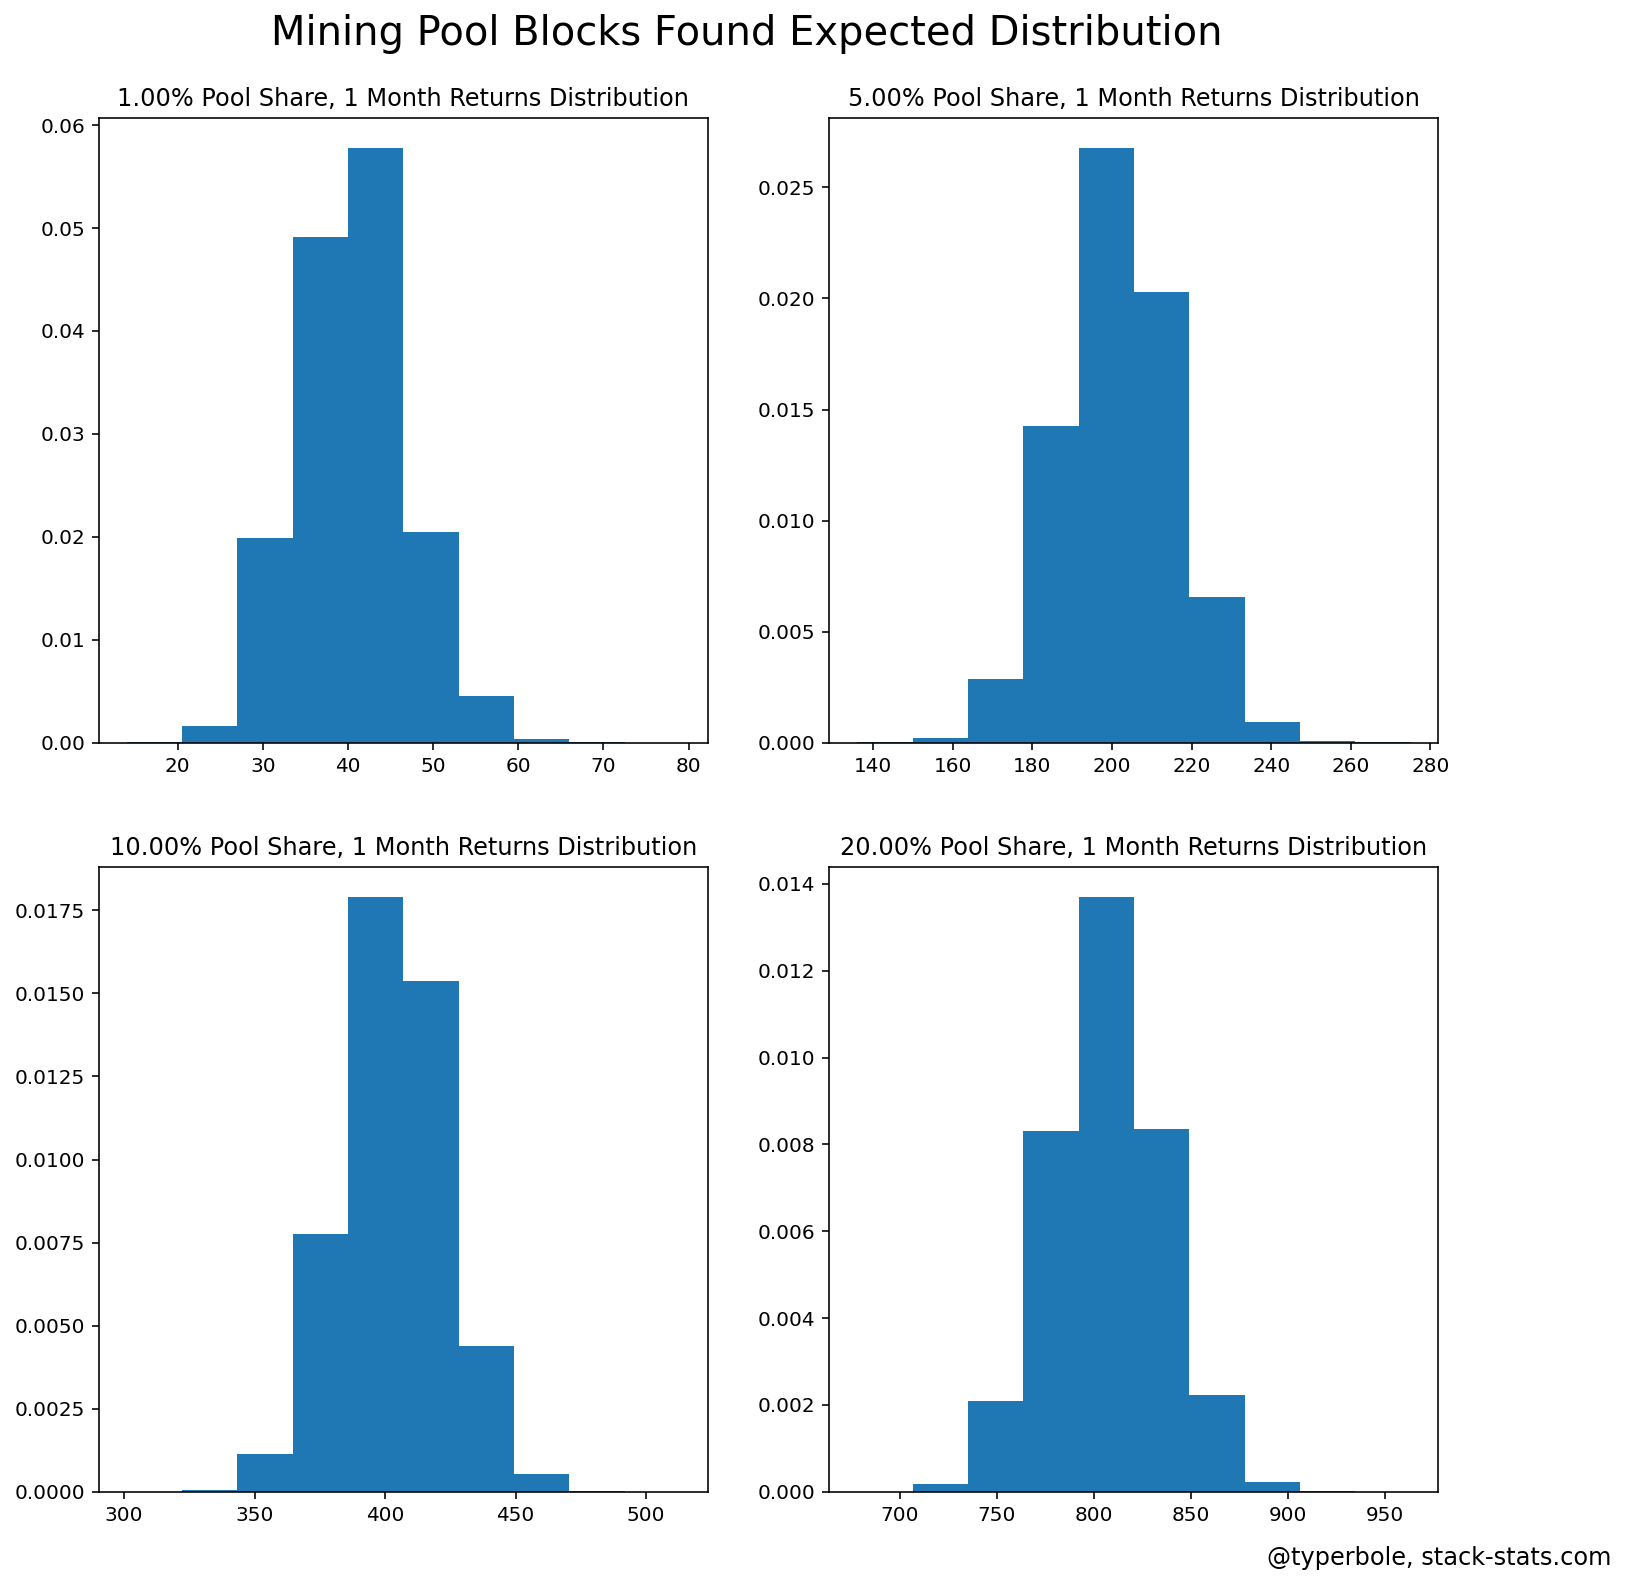

In [403]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
# fig.tight_layout()
for index, pool_size in enumerate([0.01, 0.05, 0.1, 0.2]):
    samples = np.random.poisson(pool_size * 6 * 24 * 28, 1000000)
    axs[index // 2, index % 2].hist(samples, density=True)
    axs[index // 2, index % 2].set_title("{:.2%} Pool Share, 1 Month Returns Distribution".format(pool_size))
fig.subplots_adjust(top=0.92)
fig.suptitle('Mining Pool Blocks Found Expected Distribution', fontsize=20)
fig.text(1, 0.08, '@typerbole, stack-stats.com', 
         fontsize=12, verticalalignment='bottom', horizontalalignment='right')

In [404]:
pivot = data.pivot(index='pool_size', columns='period_days', values='stdev_pct')
pivot

period_days,1,7,14,28,90,182,365
pool_size,,,,,,,
0.0001,8.346270,3.163417,2.219172,1.574915,0.880971,0.614961,0.436466
0.0002,5.926372,2.214675,1.566215,1.117506,0.620513,0.436942,0.308022
0.0003,4.785043,1.815793,1.282701,0.905366,0.509216,0.356021,0.252451
0.0004,4.141349,1.570719,1.113428,0.785918,0.438893,0.309438,0.217924
0.0005,3.745379,1.406127,0.992916,0.706219,0.391650,0.277010,0.195191
0.0006,3.436268,1.288755,0.909530,0.645131,0.358553,0.253533,0.178635
0.0007,3.179236,1.192172,0.843955,0.595529,0.331352,0.233720,0.164956
0.0008,2.944128,1.109078,0.788849,0.559273,0.311219,0.219182,0.154291
0.0009,2.765752,1.051077,0.742110,0.525712,0.293165,0.206041,0.145967


In [412]:
pivot['Pool Size'] = pivot.index
pivot.reset_index(drop=True, inplace=True)

In [413]:
import seaborn as sns
cm = sns.light_palette("red", as_cmap=True)
(
pivot[['Pool Size', 1, 7, 14, 28, 90, 182, 365]].style
    .format({
        'Pool Size': '{:,.2%}'.format,
        1: '{:,.2%}'.format,
        7: '{:,.2%}'.format,
        14: '{:,.2%}'.format,
        28: '{:,.2%}'.format,
        90: '{:,.2%}'.format,
        182: '{:,.2%}'.format,
        365: '{:,.2%}'.format})
    .background_gradient(cmap=cm, subset=[1, 7, 14, 28, 90, 182, 365], axis=None)
    .hide_index()
    .set_table_attributes("style='display:inline'").set_caption('Days In Period')
)

Pool Size,1,7,14,28,90,182,365
0.01%,847.75%,313.78%,224.56%,157.30%,87.60%,61.85%,43.49%
0.02%,596.98%,223.22%,157.07%,111.06%,62.35%,43.83%,30.82%
0.03%,482.98%,181.77%,128.68%,90.72%,50.70%,35.84%,25.20%
0.04%,414.40%,156.51%,111.51%,78.79%,43.85%,30.84%,21.76%
0.05%,375.97%,140.85%,99.60%,70.67%,39.34%,27.66%,19.55%
0.06%,338.16%,128.58%,90.86%,64.30%,35.84%,25.21%,17.74%
0.07%,315.82%,119.23%,83.74%,59.40%,33.07%,23.33%,16.41%
0.08%,291.81%,111.20%,78.54%,55.61%,31.09%,21.81%,15.43%
0.09%,277.89%,104.95%,74.21%,52.30%,29.21%,20.66%,14.55%
0.10%,265.27%,99.59%,70.18%,49.93%,27.77%,19.54%,13.86%
